Average sentiment towards Joe Biden: nan
Average sentiment towards Donald Trump: nan


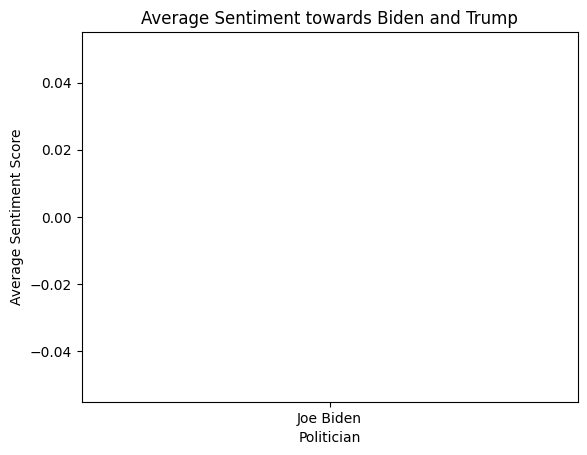

In [5]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

# Function to scrape URLs from Google search results
def scrape_google_urls(query):
    # Construct the Google search URL
    url = "https://www.google.com/search?q=" + query
    # Send a GET request to Google
    response = requests.get(url)
    # Parse the HTML response
    soup = BeautifulSoup(response.text, 'html.parser')
    # Extract URLs from search results
    urls = []
    for result in soup.find_all('div', class_='tF2Cxc'):
        link = result.find('a')['href']
        urls.append(link)
    return urls

# Function to fetch text content from URLs
def fetch_text_from_urls(urls):
    texts = []
    for url in urls:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        # Extract text content from the webpage
        text = soup.get_text()
        texts.append(text)
    return texts

# Function to preprocess text data
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    # Join stemmed tokens back into text
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text

# Function to perform sentiment analysis using VADER
def analyze_sentiment(text):
    # Initialize VADER sentiment analyzer
    analyzer = SentimentIntensityAnalyzer()
    # Perform sentiment analysis
    sentiment_scores = analyzer.polarity_scores(text)
    # Return compound sentiment score
    return sentiment_scores['compound']

# Main function
def main():
    # Query for Google search
    query_biden = "Joe Biden last year election speeches"
    query_trump = "Donald Trump last year election speeches"
    
    # Scrape URLs for Biden and Trump
    urls_biden = scrape_google_urls(query_biden)
    urls_trump = scrape_google_urls(query_trump)
    
    # Fetch text content from URLs
    texts_biden = fetch_text_from_urls(urls_biden)
    texts_trump = fetch_text_from_urls(urls_trump)
    
    # Preprocess text data
    preprocessed_texts_biden = [preprocess_text(text) for text in texts_biden]
    preprocessed_texts_trump = [preprocess_text(text) for text in texts_trump]
    
    # Perform sentiment analysis
    sentiment_scores_biden = [analyze_sentiment(text) for text in preprocessed_texts_biden]
    sentiment_scores_trump = [analyze_sentiment(text) for text in preprocessed_texts_trump]
    
    # Calculate average sentiment scores
    avg_sentiment_biden = np.mean(sentiment_scores_biden)
    avg_sentiment_trump = np.mean(sentiment_scores_trump)
    
    # Print results
    print("Average sentiment towards Joe Biden:", avg_sentiment_biden)
    print("Average sentiment towards Donald Trump:", avg_sentiment_trump)
    
    # Visualization (optional)
    politicians = ['Joe Biden', 'Donald Trump']
    avg_sentiments = [avg_sentiment_biden, avg_sentiment_trump]
    plt.bar(politicians, avg_sentiments, color=['blue', 'red'])
    plt.xlabel('Politician')
    plt.ylabel('Average Sentiment Score')
    plt.title('Average Sentiment towards Biden and Trump')
    plt.show()

if __name__ == "__main__":
    main()
    
    
    